In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import visuals as vs

In [2]:
%matplotlib inline
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

In [6]:
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [7]:
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [11]:
def accuracy_score(truth, pred):
    if len(truth) == len(pred):
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    else: 
        return "Number of predictions does not match number of outcomes!"
predictions = pd.Series(np.ones(5, dtype = int))
print accuracy_score(outcomes[:5], predictions)

Predictions have an accuracy of 60.00%.


In [12]:
def predictions_0(data):
    predictions = []
    for _, passenger in data.iterrows():
        predictions.append(0)
        
    return pd.Series(predictions)
predictions = predictions_0(data)

In [13]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 61.62%.


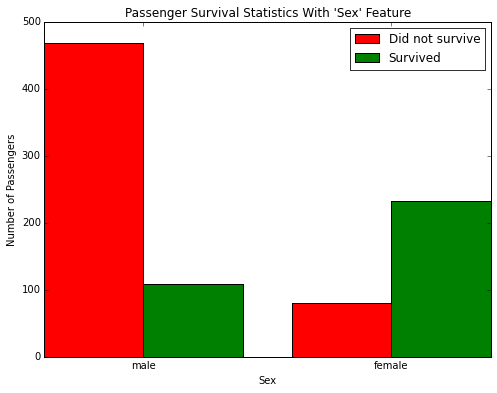

In [16]:
vs.survival_stats(data, outcomes, 'Sex')

In [18]:
def predictions_1(data):
    predictions = []
    for _, passenger in data.iterrows():
        pred = 1 if passenger['Sex'] == 'female' else 0
        predictions.append(pred)
    
    return pd.Series(predictions)
predictions = predictions_1(data)

In [19]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 78.68%.


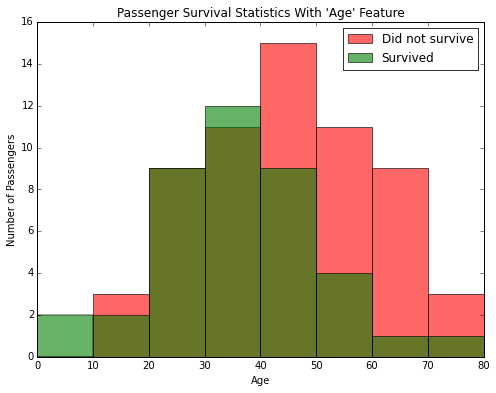

In [60]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Pclass == 1"])

In [21]:
def predictions_2(data):
    predictions = []
    for _, passenger in data.iterrows():
        pred = 0
        if passenger['Sex'] == 'female':
            pred = 1
        elif passenger['Age'] <= 10:
            pred = 1
        predictions.append(pred)
        
    return pd.Series(predictions)

predictions = predictions_2(data)
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 79.24%.


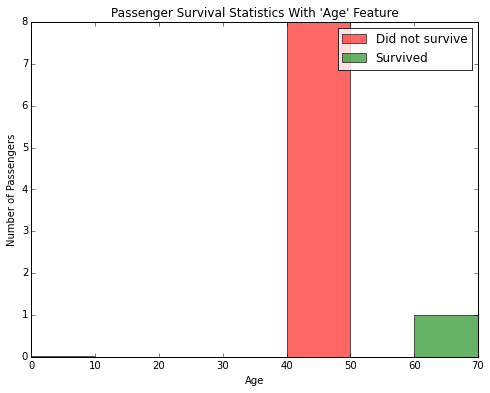

In [53]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'female'",  "Pclass == 3","Age > 40"])

In [64]:
def predictions_3(data):
    predictions = []
    for _, passenger in data.iterrows():
        pred = 0
        if passenger['Sex'] == 'female':
            pred = 1
            if passenger['Age'] > 40 and passenger['Pclass'] == 3:
                pred = 0
        elif passenger['Age'] <= 10:
            pred = 1
        predictions.append(pred)
        
    return pd.Series(predictions)

predictions = predictions_3(data)
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 80.02%.
